In [118]:
import glob
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn import preprocessing
from keras.models import Model, Sequential
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16
import pandas as pd
import glob
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest,f_regression
import seaborn as sns
from scipy import stats
from scipy.stats.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest,f_regression
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import xgboost as xgb

#####  let's have a look how the distribution of the Training dataset looks like:
      *equals Distribution :75 images in each subclass

In [54]:
def data_train():
        path_train=glob.glob('40_A_P/Train_40/*/*.png')
        
        data = pd.DataFrame(index=np.arange(0,len(path_train)), columns=['sublabel','path','M_F_40'])
        patient_id=[]
        sublabel=[]
        class_40=[]
        for i in range(len(path_train)):
                sublabel.append(path_train[i].split('\\')[1])
                class_40.append('Sublabel')
        data['path']=path_train
        data['sublabel']=sublabel
        data['M_F_40']=class_40
        return data

data_train=data_train()
print('Number of images in the training set is {}'.format(len(data_train)))
print(data_train['sublabel'].unique()==data_test['sublabel'].unique())
#print(data_test['sublabel'].unique())
#print(data_train['sublabel'].unique())



Number of images in the training set is 0


TypeError: 'function' object is not subscriptable

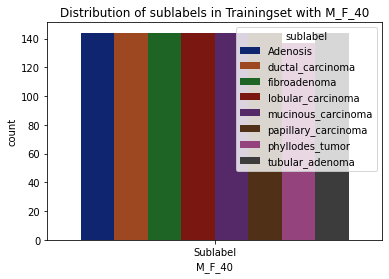

In [6]:
ax = sns.countplot(x="M_F_40",hue='sublabel', data=data_train,palette="dark").set_title('Distribution of sublabels in Trainingset with M_F_40')


 Digramm shows the Distribution of  of 8 subclasses in the Training set

In [9]:
def data_test():
        path_valid = glob.glob('0_A_P/Test_40/*/*.png', recursive=True)

        data = pd.DataFrame(index=np.arange(0, len(path_valid )), columns=['sublabel', 'path','M_F_40'])
        patient_id = []
        sublabel = []
        class_40=[]
        for i in range(len(path_valid )):
            sublabel.append(path_valid [i].split('\\')[1])
            class_40.append('Sublabel')
        data['path'] = path_valid
        data['sublabel'] = sublabel
        data['M_F_40']=class_40
        return data
data_test=data_test()
print('Number of images in the testing set is {}'.format(len(data_test)))
print(data_test['sublabel'].unique())

Number of images in the testing set is 315
['Adenosis' 'ductal_carcinoma' 'fibroadenoma' 'lobular_carcinoma'
 'mucinous_carcinoma' 'papillary_carcinoma' 'phyllodes_tumor'
 'tubular_adenoma']


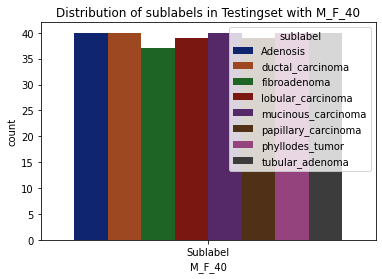

In [10]:
ax = sns.countplot(x="M_F_40",hue='sublabel', data=data_test,palette="dark").set_title('Distribution of sublabels in Testingset with M_F_40')


 Digramm shows the Distribution of  of 8 subclasses in the Testing set

In [119]:
def data_train():
    train_images=[]
    train_labels=[]
    SIZE=224
    i=0
    for directory_path in glob.glob("40_A_P/Train_40/*"):
        label = directory_path.split('\\')[-1]
        for img_path  in glob.glob(os.path.join(directory_path,"*/*.png")):    
            try:
                img = cv2.imread(img_path)       
                img = cv2.resize(img, (SIZE, SIZE))
                train_images.append(img)
                train_labels.append(label)
            except:
                break
    return train_images,train_labels
        
train_images,train_labels=data_train()
print(len(train_images))

1146


In [120]:
def data_test():
    test_images=[]
    test_labels=[]
    SIZE=224
    for directory_path in glob.glob("40_A_P/Test_40/*"):
        label = directory_path.split('\\')[-1]
        for img_path in glob.glob(os.path.join(directory_path,"*.png")):
            try:
                img = cv2.imread(img_path) 
                img = cv2.resize(img, (SIZE, SIZE))
                test_images.append(img)
                test_labels.append(label)
            except:
                break
    return test_images,test_labels
        
test_images,test_labels=data_test()
print(len(test_labels))

320


convert images un und sublabel into array:

In [121]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

test_images = np.array(test_images)
test_labels = np.array(test_labels)





transform String labels into integers labels

In [122]:

#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)





In [123]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train=train_images
y_train=train_labels_encoded
x_test=test_images
y_test = test_labels_encoded



transform pixel in number between [0,1]

In [124]:
x_train, x_test = x_train / 255.0, x_test / 255.0


In [125]:
SIZE=224
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [126]:
xgb.XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [127]:
feature_extractor=VGG_model.predict(x_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_for_training = features

In [128]:
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)
X_for_test = X_test_features

In [ ]:
model_xgboost = xgb.XGBClassifier(learning_rate=0.1,
                                      max_depth=5,
                                      n_estimators=5000,
                                      subsample=0.5,
                                      colsample_bytree=0.5,
                                      eval_metric='auc',
                                      verbosity=1)

eval_set = [(X_test_features , y_test)]

model_xgboost.fit(X_for_training,
                  y_train,
                  early_stopping_rounds=10,
                  eval_set=eval_set,
                  verbose=True)

In [ ]:
import sklearn.metrics as metrics
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

#Now predict using the trained RF model. 
prediction = model_xgboost.predict(X_test_features)
#Inverse le transform to get original label back. 
prediction = le.inverse_transform(prediction)

#Print overall accuracy
#from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction))

In [ ]:
y_train_pred = model_xgboost.predict_proba(X_for_training)
y_valid_pred = model_xgboost.predict_proba(X_test_features)

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred,multi_class="ovr"),
                                                    roc_auc_score(y_test, y_valid_pred,multi_class="ovr")))

In [529]:
x=set(le.inverse_transform(y_test))
print(x)

{'fibroadenoma', 'tubular-adenoma', 'mucinous-carcinoma', 'lobular_carcinoma', 'papillary-carcinoma', 'phyllodes_tumor', 'Adenosis', 'ductal_carcinoma'}


In [530]:
learning_rate_list = [0.05, 0.1,0.01]
max_depth_list = [3, 5,30]
n_estimators_list = [2000, 3000,5000]

params_dict = {"learning_rate": learning_rate_list,
               "max_depth": max_depth_list,
               "n_estimators": n_estimators_list}

num_combinations = 1
for v in params_dict.values(): num_combinations *= len(v) 

print(num_combinations)
params_dict

27


{'learning_rate': [0.05, 0.1, 0.01],
 'max_depth': [3, 5, 30],
 'n_estimators': [2000, 3000, 5000]}

In [531]:
def my_roc_auc_score(model, X, y): return roc_auc_score(y_train, model.predict_proba(X_for_training),multi_class="ovr")

model_xgboost_hp = GridSearchCV(estimator=xgb.XGBClassifier(subsample=0.5,
                                                                colsample_bytree=0.25,
                                                                eval_metric='auc',
                                                                use_label_encoder=False),
                                param_grid=params_dict,
                                cv=4,
                                scoring=my_roc_auc_score,
                                return_train_score=True,
                                verbose=4)

model_xgboost_hp.fit(X_for_training, y_train)

Fitting 4 folds for each of 27 candidates, totalling 108 fits
[CV 1/4] END learning_rate=0.05, max_depth=3, n_estimators=2000;, score=(train=0.983, test=0.983) total time= 4.4min
[CV 2/4] END learning_rate=0.05, max_depth=3, n_estimators=2000;, score=(train=0.995, test=0.995) total time= 4.6min
[CV 3/4] END learning_rate=0.05, max_depth=3, n_estimators=2000;, score=(train=0.990, test=0.990) total time= 4.7min
[CV 4/4] END learning_rate=0.05, max_depth=3, n_estimators=2000;, score=(train=0.988, test=0.988) total time= 4.6min
[CV 1/4] END learning_rate=0.05, max_depth=3, n_estimators=3000;, score=(train=0.983, test=0.983) total time= 6.6min
[CV 2/4] END learning_rate=0.05, max_depth=3, n_estimators=3000;, score=(train=0.995, test=0.995) total time= 6.1min
[CV 3/4] END learning_rate=0.05, max_depth=3, n_estimators=3000;, score=(train=0.990, test=0.990) total time= 6.2min
[CV 4/4] END learning_rate=0.05, max_depth=3, n_estimators=3000;, score=(train=0.988, test=0.988) total time= 6.2min
[C

[CV 3/4] END learning_rate=0.1, max_depth=30, n_estimators=5000;, score=(train=0.989, test=0.989) total time= 8.1min
[CV 4/4] END learning_rate=0.1, max_depth=30, n_estimators=5000;, score=(train=0.988, test=0.988) total time= 8.6min
[CV 1/4] END learning_rate=0.01, max_depth=3, n_estimators=2000;, score=(train=0.983, test=0.983) total time= 8.0min
[CV 2/4] END learning_rate=0.01, max_depth=3, n_estimators=2000;, score=(train=0.995, test=0.995) total time= 8.3min
[CV 3/4] END learning_rate=0.01, max_depth=3, n_estimators=2000;, score=(train=0.989, test=0.989) total time= 8.2min
[CV 4/4] END learning_rate=0.01, max_depth=3, n_estimators=2000;, score=(train=0.988, test=0.988) total time= 8.0min
[CV 1/4] END learning_rate=0.01, max_depth=3, n_estimators=3000;, score=(train=0.983, test=0.983) total time=10.3min
[CV 2/4] END learning_rate=0.01, max_depth=3, n_estimators=3000;, score=(train=0.995, test=0.995) total time=10.8min
[CV 3/4] END learning_rate=0.01, max_depth=3, n_estimators=3000;

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.25,
                                     enable_categorical=False,
                                     eval_metric='auc', gamma=None, gpu_id=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=0.5, tree_method=None,
                           

In [532]:
df_cv_results = pd.DataFrame(model_xgboost_hp.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
                               'param_learning_rate', 'param_max_depth', 'param_n_estimators']]
df_cv_results.sort_values(by='rank_test_score', inplace=True)
df_cv_results

,rank_test_score,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators
23,1,0.989307,0.989307,0.01,5,5000
22,2,0.989234,0.989234,0.01,5,3000
7,3,0.989223,0.989223,0.05,30,3000
8,4,0.989220,0.989220,0.05,30,5000
26,5,0.989218,0.989218,0.01,30,5000
6,6,0.989217,0.989217,0.05,30,2000
5,7,0.989136,0.989136,0.05,5,5000
3,8,0.989135,0.989135,0.05,5,2000
25,9,0.989130,0.989130,0.01,30,3000
4,10,0.989129,0.989129,0.05,5,3000


Text(0.5, 1.0, 'Performance wrt # of Trees and Depth')

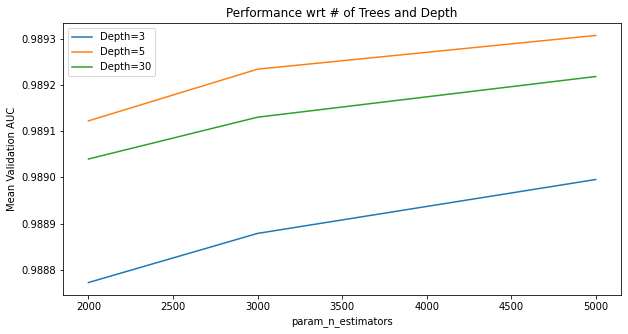

In [533]:
# First sort by number of estimators as that would be x-axis
df_cv_results.sort_values(by='param_n_estimators', inplace=True)

# Find values of AUC for learning rate of 0.05 and different values of depth
#lr_d2 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.01) & (df_cv_results['param_max_depth']==2),:]
lr_d3 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.01) & (df_cv_results['param_max_depth']==3),:]
lr_d5 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.01) & (df_cv_results['param_max_depth']==5),:]
lr_d7 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.01) & (df_cv_results['param_max_depth']==30),:]

# Let us plot now
fig, ax = plt.subplots(figsize=(10,5))
#lr_d2.plot(x='param_n_estimators', y='mean_test_score', label='Depth=2', ax=ax)
lr_d3.plot(x='param_n_estimators', y='mean_test_score', label='Depth=3', ax=ax)
lr_d5.plot(x='param_n_estimators', y='mean_test_score', label='Depth=5', ax=ax)
lr_d7.plot(x='param_n_estimators', y='mean_test_score', label='Depth=30', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt # of Trees and Depth')

Text(0.5, 1.0, 'Performance wrt learning rate')

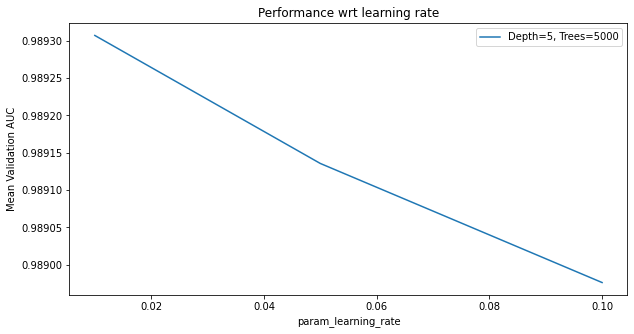

In [534]:
# First sort by learning rate as that would be x-axis
df_cv_results.sort_values(by='param_learning_rate', inplace=True)

# Find values of AUC for learning rate of 0.05 and different values of depth
lr_t3k_d2 = df_cv_results.loc[(df_cv_results['param_n_estimators']==5000) & (df_cv_results['param_max_depth']==5),:]

# Let us plot now
fig, ax = plt.subplots(figsize=(10,5))
lr_t3k_d2.plot(x='param_learning_rate', y='mean_test_score', label='Depth=5, Trees=5000', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt learning rate')

In [129]:

model_xgboost_fin = xgb.XGBClassifier(learning_rate=0.01,
                                          max_depth=5,
                                          n_estimators=5000,
                                          subsample=0.5,
                                          colsample_bytree=0.25,
                                          eval_metric='auc',
                                          verbosity=1,
                                          use_label_encoder=False)

# Passing both training and validation dataset as we want to plot AUC for both
eval_set = [(X_for_training, y_train),(X_test_features, y_test)]

model_xgboost_fin.fit(X_for_training,
                  y_train,
                  early_stopping_rounds=10,
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-auc:0.93710	validation_1-auc:0.78592
[1]	validation_0-auc:0.97438	validation_1-auc:0.84191
[2]	validation_0-auc:0.98631	validation_1-auc:0.87833
[3]	validation_0-auc:0.99156	validation_1-auc:0.88420
[4]	validation_0-auc:0.99420	validation_1-auc:0.89694
[5]	validation_0-auc:0.99537	validation_1-auc:0.90777
[6]	validation_0-auc:0.99625	validation_1-auc:0.91736
[7]	validation_0-auc:0.99737	validation_1-auc:0.92197
[8]	validation_0-auc:0.99781	validation_1-auc:0.92384
[9]	validation_0-auc:0.99804	validation_1-auc:0.92309
[10]	validation_0-auc:0.99848	validation_1-auc:0.92493
[11]	validation_0-auc:0.99874	validation_1-auc:0.92895
[12]	validation_0-auc:0.99890	validation_1-auc:0.93044
[13]	validation_0-auc:0.99902	validation_1-auc:0.93126
[14]	validation_0-auc:0.99905	validation_1-auc:0.93202
[15]	validation_0-auc:0.99920	validation_1-auc:0.93310
[16]	validation_0-auc:0.99925	validation_1-auc:0.93394
[17]	validation_0-auc:0.99933	validation_1-auc:0.93639
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.25,
              enable_categorical=False, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5000, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=0.5,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

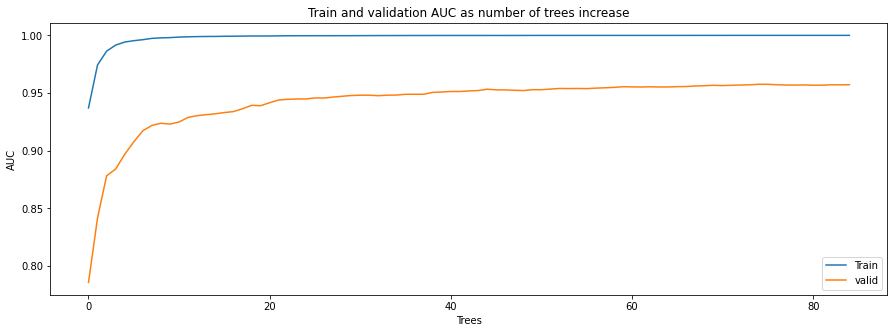

In [130]:
evaluation_results = model_xgboost_fin.evals_result()

# Index into each key to find AUC values for training and validation data after each tree
train_auc_tree = evaluation_results['validation_0']['auc']
valid_auc_tree = evaluation_results['validation_1']['auc']


# Plotting Section
plt.figure(figsize=(15,5))

plt.plot(train_auc_tree, label='Train')
plt.plot(valid_auc_tree, label='valid')

plt.title("Train and validation AUC as number of trees increase")
plt.xlabel("Trees")
plt.ylabel("AUC")
plt.legend(loc='lower right')
plt.show()

In [131]:
y_train_pred = model_xgboost_fin.predict_proba(X_for_training)
y_valid_pred = model_xgboost_fin.predict_proba(X_test_features)

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred,multi_class="ovr"),
                                                    roc_auc_score(y_test, y_valid_pred,multi_class="ovr")))

AUC Train: 1.0000
AUC Valid: 0.9576


In [132]:
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [133]:
y_pred = model_xgboost_fin.predict(X_test_features)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(predictions)
prediction_0 = le.inverse_transform(predictions)


Accuracy: 80.00%
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 3, 4, 6, 0, 3, 7, 0, 1, 1, 1, 1, 1, 7, 1, 1, 3, 2, 3, 6, 6, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 4, 2, 7, 7, 7, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 1, 3, 6, 1, 5, 3, 3, 3, 3, 3, 3, 4, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 4, 1, 3, 2, 2, 4, 4, 7, 4, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 0, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 4, 7, 7, 4, 4, 2, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 2, 4, 0, 0, 6, 3, 3, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7]


In [134]:
from sklearn.metrics import confusion_matrix
cm_grid = confusion_matrix(test_labels, prediction_0)

print(test_labels)
print(prediction_0)
print(cm_grid)


['Adenosis' 'Adenosis' 'Adenosis' 'Adenosis' 'Adenosis' 'Adenosis'
 'Adenosis' 'Adenosis' 'Adenosis' 'Adenosis' 'Adenosis' 'Adenosis'
 'Adenosis' 'Adenosis' 'Adenosis' 'Adenosis' 'Adenosis' 'Adenosis'
 'Adenosis' 'Adenosis' 'Adenosis' 'Adenosis' 'Adenosis' 'Adenosis'
 'Adenosis' 'Adenosis' 'Adenosis' 'Adenosis' 'Adenosis' 'Adenosis'
 'Adenosis' 'Adenosis' 'Adenosis' 'Adenosis' 'Adenosis' 'Adenosis'
 'Adenosis' 'Adenosis' 'Adenosis' 'Adenosis' 'ductal_carcinoma'
 'ductal_carcinoma' 'ductal_carcinoma' 'ductal_carcinoma'
 'ductal_carcinoma' 'ductal_carcinoma' 'ductal_carcinoma'
 'ductal_carcinoma' 'ductal_carcinoma' 'ductal_carcinoma'
 'ductal_carcinoma' 'ductal_carcinoma' 'ductal_carcinoma'
 'ductal_carcinoma' 'ductal_carcinoma' 'ductal_carcinoma'
 'ductal_carcinoma' 'ductal_carcinoma' 'ductal_carcinoma'
 'ductal_carcinoma' 'ductal_carcinoma' 'ductal_carcinoma'
 'ductal_carcinoma' 'ductal_carcinoma' 'ductal_carcinoma'
 'ductal_carcinoma' 'ductal_carcinoma' 'ductal_carcinoma'
 'ductal_car

[Text(0, 0.5, 'A'),
 Text(0, 1.5, 'DC'),
 Text(0, 2.5, 'FB'),
 Text(0, 3.5, 'LC'),
 Text(0, 4.5, 'MC'),
 Text(0, 5.5, 'PC'),
 Text(0, 6.5, 'PT'),
 Text(0, 7.5, 'TA')]

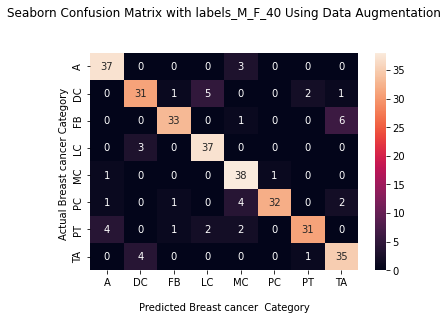

In [89]:
ax=sns.heatmap(cm_grid, annot=True)
ax.set_title('Seaborn Confusion Matrix with labels_M_F_40 Using Data Augmentation\n\n');
ax.set_xlabel('\nPredicted Breast cancer  Category')
ax.set_ylabel('Actual Breast cancer Category ')
ax.xaxis.set_ticklabels(['A','DC','FB','LC','MC','PC','PT','TA'])
ax.yaxis.set_ticklabels(['A','DC','FB','LC','MC','PC','PT','TA'])

The prediction for this image is:  ['ductal_carcinoma']
The actual label for this image is:  ductal_carcinoma


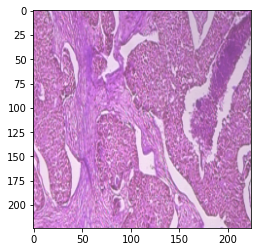

In [31]:
#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction = model_xgboost_fin.predict(input_img_features)[0] 
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

In [32]:

Tp_0=cm_grid[0,0]
Tp_1=cm_grid[1,1]
Tp_2=cm_grid[2,2]
Tp_3=cm_grid[3,3]
Tp_4=cm_grid[4,4]
Tp_5=cm_grid[5,5]
Tp_6=cm_grid[6,6]
Tp_7=cm_grid[7,7]

FN_0=cm_grid[0,1]+cm_grid[0,2]+cm_grid[0,3]+cm_grid[0,4]+cm_grid[0,5]+cm_grid[0,6]+cm_grid[0,7]
FN_1=cm_grid[1,0]+cm_grid[1,2]+cm_grid[1,3]+cm_grid[1,4]+cm_grid[1,5]+cm_grid[1,6]+cm_grid[1,7]
FN_2=cm_grid[2,0]+cm_grid[2,1]+cm_grid[2,3]+cm_grid[2,4]+cm_grid[2,5]+cm_grid[2,6]+cm_grid[2,7]
FN_3=cm_grid[3,0]+cm_grid[3,1]+cm_grid[3,2]+cm_grid[3,4]+cm_grid[3,5]+cm_grid[3,6]+cm_grid[3,7]
FN_4=cm_grid[4,0]+cm_grid[4,1]+cm_grid[4,2]+cm_grid[4,3]+cm_grid[4,5]+cm_grid[4,6]+cm_grid[4,7]
FN_5=cm_grid[5,0]+cm_grid[5,1]+cm_grid[5,2]+cm_grid[5,3]+cm_grid[5,4]+cm_grid[5,6]+cm_grid[5,7]
FN_6=cm_grid[6,0]+cm_grid[6,1]+cm_grid[6,2]+cm_grid[6,3]+cm_grid[6,4]+cm_grid[6,5]+cm_grid[6,7]
FN_7=cm_grid[7,0]+cm_grid[7,1]+cm_grid[7,2]+cm_grid[7,3]+cm_grid[7,4]+cm_grid[7,5]+cm_grid[7,6]



Fp_0=cm_grid[1,0]+cm_grid[2,0]+cm_grid[3,0]+cm_grid[4,0]+cm_grid[5,0]+cm_grid[6,0]+cm_grid[7,0]
Fp_1=cm_grid[0,1]+cm_grid[2,1]+cm_grid[3,1]+cm_grid[4,1]+cm_grid[5,1]+cm_grid[6,1]+cm_grid[7,1]
Fp_2=cm_grid[0,2]+cm_grid[1,2]+cm_grid[3,2]+cm_grid[4,2]+cm_grid[5,2]+cm_grid[6,2]+cm_grid[7,2]
Fp_3=cm_grid[0,3]+cm_grid[1,3]+cm_grid[2,3]+cm_grid[4,3]+cm_grid[5,3]+cm_grid[6,3]+cm_grid[7,3]
Fp_4=cm_grid[0,4]+cm_grid[1,4]+cm_grid[2,4]+cm_grid[3,4]+cm_grid[5,4]+cm_grid[6,4]+cm_grid[7,4]
Fp_5=cm_grid[0,5]+cm_grid[1,5]+cm_grid[2,5]+cm_grid[3,5]+cm_grid[4,5]+cm_grid[6,5]+cm_grid[7,5]
Fp_6=cm_grid[0,6]+cm_grid[1,6]+cm_grid[2,6]+cm_grid[3,6]+cm_grid[4,6]+cm_grid[5,6]+cm_grid[7,6]
Fp_7=cm_grid[0,7]+cm_grid[1,7]+cm_grid[2,7]+cm_grid[3,7]+cm_grid[4,7]+cm_grid[5,7]+cm_grid[6,7]

l=[]
for i in range(len(cm_grid)):
    for j in range(len(cm_grid)):
        l.append(cm_grid[i,j])
        
    
Tn_0=sum(l)-Tp_0-FN_0-Fp_0
Tn_1=sum(l)-Tp_1-FN_1-Fp_1
Tn_2=sum(l)-Tp_2-FN_2-Fp_2
Tn_3=sum(l)-Tp_3-FN_3-Fp_3
Tn_4=sum(l)-Tp_4-FN_4-Fp_4
Tn_5=sum(l)-Tp_5-FN_5-Fp_5
Tn_6=sum(l)-Tp_6-FN_6-Fp_6
Tn_7=sum(l)-Tp_7-FN_7-Fp_7

TP=[Tp_0,Tp_1,Tp_2,Tp_3,Tp_4,Tp_5,Tp_6,Tp_7]
FN=[FN_0,FN_1,FN_2,FN_3,FN_4,FN_5,FN_6,FN_7]
FP=[Fp_0,Fp_1,Fp_2,Fp_3,Fp_4,Fp_5,Fp_6,Fp_7]
TN=[Tn_0,Tn_1,Tn_1,Tn_2,Tn_3,Tn_4,Tn_6,Tn_7]

df=pd.DataFrame(index=np.arange(0,8),columns=['TP','FN','FP','TN'])
df['TP']=TP
df['FN']=FN
df['FP']=FP
df['TN']=TN
print(df)




   TP  FN  FP   TN
0  37   3   2  278
1  31   9   4  276
2  33   7   2  276
3  40   0   5  278
4  38   2   8  275
5  32   8   1  272
6  40   0   3  277
7  35   5   9  271


In [33]:
df.rename(index={0:'A',1:'DC',2:'FB',3:'LC',4:'MC',5:'PC',6:'PT',7:'TA'},inplace=True)

df

,TP,FN,FP,TN
A,37,3,2,278
DC,31,9,4,276
FB,33,7,2,276
LC,40,0,5,278
MC,38,2,8,275
PC,32,8,1,272
PT,40,0,3,277
TA,35,5,9,271


In [101]:
from bokeh.io import output_file, show
from bokeh.plotting import figure
sublabel=['A','DC','FB','LC','MC','PC','PT','TA']
ds=['TP','FN','FP','TN']
colors = ["#c9d9d3", "#718dbf", "#e84d60",'#ffa180']

data = {'sublabel' : sublabel,
        'TP'   : [37,30,30,40,34,30,39,30],
        'FN'   : [3,10,10,0,6,10,1,10],
        'FP'   : [3,10,5,7,3,5,5,12],
        'TN'  :[277,270,270,275,273,277,275,268]  
       }
p = figure(x_range=sublabel, height=250, title="Number of TP,FN,FP,TN with Magnification factors 40X & Data Augumentation",
           toolbar_location=None, tools="hover", tooltips="$name @fruits: @$name")

p.vbar_stack(ds, x='sublabel', width=0.9, color=colors, source=data,
             legend_label=ds)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)

In [545]:


'''prediction = model.predict(X_test_features)
from sklearn.preprocessing import OneHotEncoder
#Inverse le transform to get original label back. 
prediction = le.inverse_transform(prediction)
print(roc_auc_score(y_test,model.predict_proba(X_test_features),multi_class='ovo'))




proba =model.predict_proba(X_test_features)
predicted_class0=proba[:,0]
predicted_class1=proba[:,1]
predicted_class2=proba[:,2]
predicted_class3=proba[:,3]
predicted_class4=proba[:,4]
predicted_class5=proba[:,5]
predicted_class6=proba[:,6]
predicted_class7=proba[:,7]
print('  predicted probality for class 0 is : \n {}'.format(predicted_class0[:]))
print('  predicted probality for class 1 is : \n {}'.format(predicted_class1[:]))
print('  predicted probality for class 2 is : \n {}'.format(predicted_class2[:]))
print('  predicted probality for class 3 is : \n {}'.format(predicted_class3[:]))
print('  predicted probality for class 4 is : \n {}'.format(predicted_class4[:]))
print('  predicted probality for class 5 is : \n {}'.format(predicted_class5[:]))
print('  predicted probality for class 6 is : \n {}'.format(predicted_class6[:]))
print('  predicted probality for class 7 is : \n {}'.format(predicted_class7[:]))'''

"prediction = model.predict(X_test_features)\nfrom sklearn.preprocessing import OneHotEncoder\n#Inverse le transform to get original label back. \nprediction = le.inverse_transform(prediction)\nprint(roc_auc_score(y_test,model.predict_proba(X_test_features),multi_class='ovo'))\n\n\n\n\nproba =model.predict_proba(X_test_features)\npredicted_class0=proba[:,0]\npredicted_class1=proba[:,1]\npredicted_class2=proba[:,2]\npredicted_class3=proba[:,3]\npredicted_class4=proba[:,4]\npredicted_class5=proba[:,5]\npredicted_class6=proba[:,6]\npredicted_class7=proba[:,7]\nprint('  predicted probality for class 0 is : \n {}'.format(predicted_class0[:]))\nprint('  predicted probality for class 1 is : \n {}'.format(predicted_class1[:]))\nprint('  predicted probality for class 2 is : \n {}'.format(predicted_class2[:]))\nprint('  predicted probality for class 3 is : \n {}'.format(predicted_class3[:]))\nprint('  predicted probality for class 4 is : \n {}'.format(predicted_class4[:]))\nprint('  predicted pr

In [546]:
#roc_auc_score(y_test, model.predict_proba(X_test_features), multi_class='ovr')

In [103]:
from sklearn.metrics import classification_report
>>> target_names =['Adenosis', 'ductal_carcinoma','fibroadenoma','lobular_carcinoma','mucinous-carcinoma','papillary-carcinoma','phyllodes_tumor','tubular-adenoma']
>>> print(classification_report(y_test, predictions,target_names=target_names))

                     precision    recall  f1-score   support

           Adenosis       0.93      0.93      0.93        40
   ductal_carcinoma       0.75      0.75      0.75        40
       fibroadenoma       0.86      0.75      0.80        40
  lobular_carcinoma       0.85      1.00      0.92        40
 mucinous-carcinoma       0.92      0.85      0.88        40
papillary-carcinoma       0.86      0.75      0.80        40
    phyllodes_tumor       0.89      0.97      0.93        40
    tubular-adenoma       0.71      0.75      0.73        40

           accuracy                           0.84       320
          macro avg       0.84      0.84      0.84       320
       weighted avg       0.84      0.84      0.84       320



<class 'list'>


In [106]:
# importing pandas as pd
import pandas as pd
  
# import the StrinIO function
# from io module
from io import StringIO
  
# wrap the string data in StringIO function
StringData = StringIO("""subclass;precision;recall;f1-score
                            AD;0.93;0.93;0.93 
                            DC;0.75;0.75;0.75
                            FB;0.86;0.75;0.80
                            LC;0.85;1.00;0.92
                            MC;0.92;0.85;0.88
                            PC;0.86;0.75;0.80
                            PT;0.89;0.97;0.93
                            TA ;0.71;0.75;0.73 """)
  
# let's read the data using the Pandas
# read_csv() function
df = pd.read_csv(StringData, sep =";")
  
# Print the dataframe

print(df)



                          subclass  precision  recall  f1-score
0                               AD       0.93    0.93      0.93
1                               DC       0.75    0.75      0.75
2                               FB       0.86    0.75      0.80
3                               LC       0.85    1.00      0.92
4                               MC       0.92    0.85      0.88
5                               PC       0.86    0.75      0.80
6                               PT       0.89    0.97      0.93
7                              TA        0.71    0.75      0.73


In [107]:
df=df.set_index('subclass')
print(df)

                                 precision  recall  f1-score
subclass                                                    
                            AD        0.93    0.93      0.93
                            DC        0.75    0.75      0.75
                            FB        0.86    0.75      0.80
                            LC        0.85    1.00      0.92
                            MC        0.92    0.85      0.88
                            PC        0.86    0.75      0.80
                            PT        0.89    0.97      0.93
                            TA        0.71    0.75      0.73


In [108]:

df.sort_values('f1-score',inplace=True)

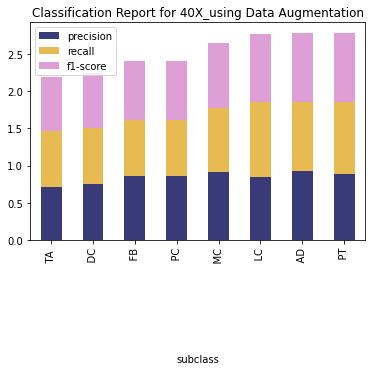

In [111]:
df.plot.bar(stacked=True,colormap='tab20b',title='Classification Report for 40X_using Data Augmentation');